In [3]:
import pandas as pd #import libraries.
import numpy as np

In [4]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
target = "Strength" #predictors-p and target-t
p = concrete_data.copy()
t = p.pop(target)

In [6]:
p.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
t.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
n_cols = p.shape[1]# number of predictors
input_shape = (n_cols,)

In [9]:
from sklearn.model_selection import train_test_split #import librarie for train test.

In [12]:
from tensorflow import keras as K #import the keras package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
def regression_model(network_arch,
                     input_shape,
                     optimizer = "adam",
                     loss = "mean_squared_error",
                    ):

    model = Sequential()
    
    nlayers     = len(network_arch)
    final_layer = "layer_" + str(nlayers)
    
    for k,layer in network_arch.items():
        n_units    = layer.get("n_units")
        activation = layer.get("activation")
        if k == "layer_1":
            model.add(Dense(n_units, activation=activation, input_shape=input_shape))
        elif k == final_layer:
            model.add(Dense(n_units))
        else:
            model.add(Dense(n_units, activation=activation))
    model.compile(optimizer=optimizer, loss=loss)
    
    return model

In [14]:
#10 hidden layer.
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture1))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
def train_and_test_several_models(p,t,
                                  test_size,
                                  model_arch,
                                  input_shape,
                                  optimizer,
                                  loss,
                                  niterations,
                                  epochs,
                                  pred_norm = False,
                                  seed = 345,
                                  verbose = 2,
                                 ):
    metric_list = np.zeros(niterations)
    
    print()
    print("Launching {} iterations of".format(niterations))
    print(" - train/test split => test_size = {}".format(test_size))
    if pred_norm:
        print(" - Apply predictors normalization")
    else:
        print(" - No    predictors normalization")
    print(" - model architecture: {}".format(model_arch))
    print(" - model training:")
    print("   * epochs    = {}".format(epochs))
    print("   * optimizer = {}".format(optimizer))
    print("   * loss      = {}".format(loss))
    print()
    
    for i in range(niterations):    
        myseed = seed + i*2 
        p_train, p_test, t_train, t_test = train_test_split(p, t, test_size=test_size, random_state=myseed)
        model = regression_model(network_arch = model_arch,
                                 input_shape = input_shape,
                                 optimizer = optimizer,
                                 loss  = loss)
        if pred_norm: 
            p_train_mean = p_train.mean()
            p_train_std  = p_train.std()
            p_train = (p_train - p_train_mean)/p_train_std
            p_test  = (p_test  - p_train_mean)/p_train_std

        myverbose = 0
        if i == 0:
            myverbose = verbose
            print("Train/test splitting for iteration {}".format(i+1))
            print("  p_train.shape = {}".format(p_train.shape))
            print("  t_train.shape = {}".format(t_train.shape))
            print("  p_test.shape  = {}".format(p_test.shape))
            print("  t_test.shape  = {}".format(t_test.shape))
            print(p_train.head())
            print()
            print("Model summary for iteration {}".format(i+1))
            model.summary()
            print()
            print()
        model.fit(p_train, t_train, epochs=epochs, verbose=verbose)
        t_pred = model.predict(p_test)

        result = np.sqrt(mean_squared_error(t_test,t_pred))
        print("{}: sqrt(mse) = {}".format(i+1,result))
        metric_list[i] = result
    print()
    return metric_list

In [17]:
niterations = 50 
test_size = 0.3 

In [18]:
sq_mse_list_A = train_and_test_several_models(p = p,
                                              t = t,
                                              test_size = test_size,
                                              model_arch = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer = "adam",
                                              loss = "mean_squared_error",
                                              niterations = niterations,
                                              epochs = 50,
                                              seed = 345,
                                              verbose = 0,
                                              pred_norm = False,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - No    predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train/test splitting for iteration 1
  p_train.shape = (721, 8)
  t_train.shape = (721,)
  p_test.shape  = (309, 8)
  t_test.shape  = (309,)
     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
870   149.0               139.0    109.0  193.0               6.0   
875   155.0               183.0      0.0  193.0               9.0   
488   387.0                20.0     94.0  157.0              14.3   
10    198.6               132.4      0.0  192.0               0.0   
391   397.0                17.2    158.0  167.0              20.8   

     Coarse Aggregate  Fin

2022-02-27 20:11:49.506855: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2022-02-27 20:11:49.513218: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2593900000 Hz
2022-02-27 20:11:49.514538: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562e914cfc20 executing computations on platform Host. Devices:
2022-02-27 20:11:49.514588: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-02-27 20:11:49.546585: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

1: sqrt(mse) = 22.089287779759815
2: sqrt(mse) = 13.308824509528597
3: sqrt(mse) = 15.514807317967465
4: sqrt(mse) = 13.823095595424325
5: sqrt(mse) = 11.328403661974704
6: sqrt(mse) = 27.64974325484277
7: sqrt(mse) = 13.385343120569022
8: sqrt(mse) = 13.924289604933923
9: sqrt(mse) = 26.66538653713219
10: sqrt(mse) = 10.089131729051251
11: sqrt(mse) = 26.629872954292566
12: sqrt(mse) = 18.846050979584497
13: sqrt(mse) = 9.641184769598294
14: sqrt(mse) = 13.571137358966547
15: sqrt(mse) = 11.809701495338224
16: sqrt(mse) = 15.26804405581214
17: sqrt(mse) = 10.499384917626832
18: sqrt(mse) = 19.678159059261752
19: sqrt(mse) = 12.593690479583973
20: sqrt(mse) = 10.30319107604561
21: sqrt(mse) = 14.006988888522844
22: sqrt(mse) = 11.943840404602815
23: sqrt(mse) = 10.539960093325524
24: sqrt(mse) = 9.944686815771528
25: sqrt(mse) = 19.34575240158936
26: sqrt(mse) = 14.017797429511605
27: sqrt(mse) = 17.84908798548927
28: sqrt(mse) = 33.56193160309007
29: sqrt(mse) = 11.483108144347334
30:

In [19]:
mean_sqmse_A = np.mean(sq_mse_list_A)
std_sqmse_A = np.std(sq_mse_list_A)

df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,16.604487,6.677


In [20]:
figsize = (20,7)
nbins = 20

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(result_list,
                 label_list,
                 var_name = "sq(mse)",
                 figsize = (15,10),
                 nbins = 10):
    
    if len(result_list) != len(label_list):
        raise ValueError("lenghts of result_list and label_list has to be the same")
        
    if len(result_list) == 0:
        raise ValueError("lenght of result_list has to be > 0")
        
    color_list = ["b","r","m","y"]
    
    pmin = +1.0e+20
    pmax = -1.0e+20
    for arr in result_list:
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)
        
        if pmin > min_tmp:
            pmin = min_tmp
        if pmax < max_tmp:
            pmax = max_tmp
    
    percent = 0.01
    delta = pmax - pmin
    pmin -= percent*delta
    pmax += percent*delta
        
    bins = np.linspace(pmin, pmax, nbins+1) 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    porcent = 0.05
    tmax = -1.0e+20
    for i,arr in enumerate(result_list): 
        n,_,_ = ax.hist(x = arr,
                        bins = bins,
                        color = color_list[i],
                        alpha = 0.5,
                        density = False,
                        label = label_list[i]
                       )
        
        if tmax < np.amax(n):
            tmax = np.amax(n)

    ax.legend()
    ax.set_xlim([bins[0],bins[-1]])
    ax.set_ylim([0,tmax*(1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('Occurences')
    ax.set_title(var_name + ' distribution')
    
    fig.tight_layout()

    plt.show()

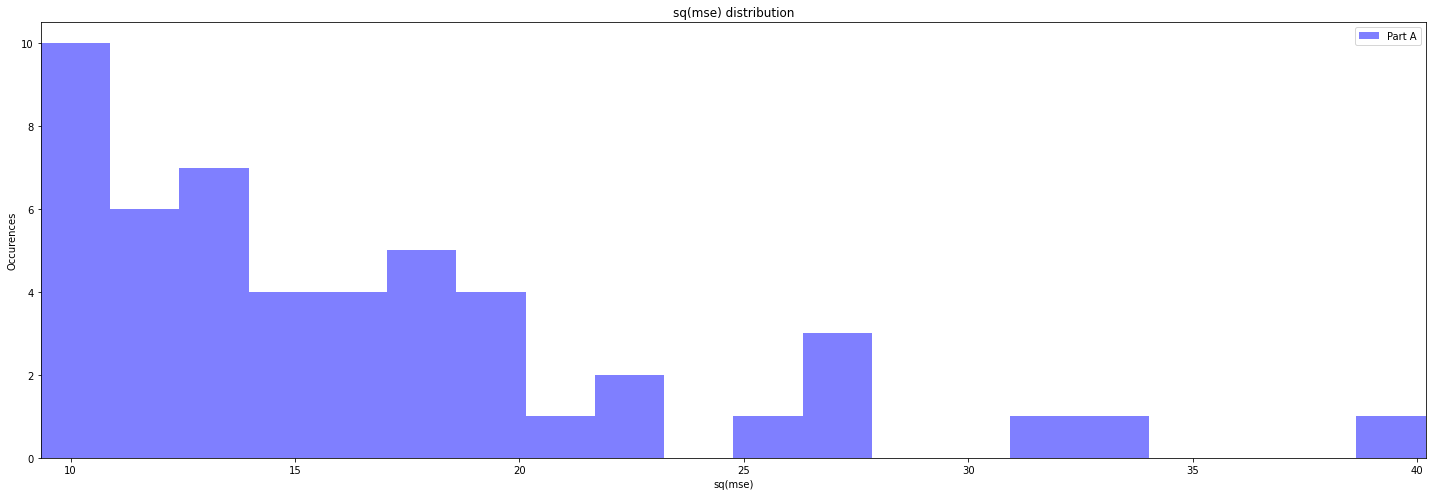

In [25]:
plot_results(result_list = [sq_mse_list_A],
             label_list  = ["Part A"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)